In [35]:
from constants import *
from TwoQubits import *
from TwoQubitGates import *
from helper_functions_2Qubits import *
from QuantumFourierTransform import *

In [36]:
# define qubits q1 and q2
qq = TwoQubits([0,0,-1],[0,0,-1])

In [37]:
print(qq.coef_matrix)
print(qq.get_matrix())

[[ 0.25  0.    0.   -0.25]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [-0.25  0.    0.    0.25]]
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [38]:
ideal_case = ideal_QFT_circuit(qq.coef_matrix)

In [39]:
error_mats = []
for x1 in range(10):
    for y1 in range(10):
        for z1 in range(10):
            print(x1, y1, z1)
            for x2 in range(10):
                for y2 in range(10):
                    for z2 in range(10):
                        if (x1+y1+z1)!=0 and (x2+y2+z2!=0):
                            scale1 = 1/np.sqrt(x1**2+y1**2+z1**2)
                            scale2 = 1/np.sqrt(x2**2+y2**2+z2**2)
                            qq = TwoQubits([scale1*x1,scale1*y1,scale1*z1],[scale2*x2,scale2*y2,scale2*z2])
                            ideal_case = ideal_QFT_circuit(qq.coef_matrix)
                            for i in range(10):
                                qq = TwoQubits([scale1*x1,scale1*y1,scale1*z1],[scale2*x2,scale2*y2,scale2*z2])
                                noisy_case = noisy_QFT_circuit(qq.coef_matrix, 200+x1-y2+y1*z1*x2+z2+i, 27261549*i)
                                error_mats.append(get_rho_from_Pauli_basis(noisy_case-ideal_case))
error_mats = np.array(error_mats)
print(np.average(np.average(error_mats, axis=0)), np.max(error_mats))
    

0 0 0
0 0 1


/Users/irinaheinz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/Users/irinaheinz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/Users/irinaheinz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/Users/irinaheinz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


KeyboardInterrupt: 

In [ ]:
#(-0.002548903115483398-4.336808689942018e-19j) (0.05936606056263416+0j)
#(1.724626713234316e-05+4.26500762510522e-22j) (0.03522047352872176+0j)

----------------------------
(1.724626713234316e-05+4.26500762510522e-22j) (0.03522047352872176+0j)


In [9]:
error_mats.shape

(9980010, 4, 4)

In [11]:
avg_mat = np.average(error_mats, axis=0)

In [12]:
avg_mat

array([[-0.00888343-7.86930994e-23j, -0.00375154-2.37742538e-03j,
        -0.00577224-8.00399980e-03j, -0.00316971-1.50990338e-02j],
       [-0.00375154+2.37742538e-03j,  0.00589054-3.53903972e-22j,
        -0.00342249-1.28975820e-03j,  0.00022784-3.88737474e-04j],
       [-0.00577224+8.00399980e-03j, -0.00342249+1.28975820e-03j,
         0.00243452-1.92774908e-22j, -0.00450308-2.59946391e-03j],
       [-0.00316971+1.50990338e-02j,  0.00022784+3.88737474e-04j,
        -0.00450308+2.59946391e-03j,  0.00055837+6.25371980e-22j]])

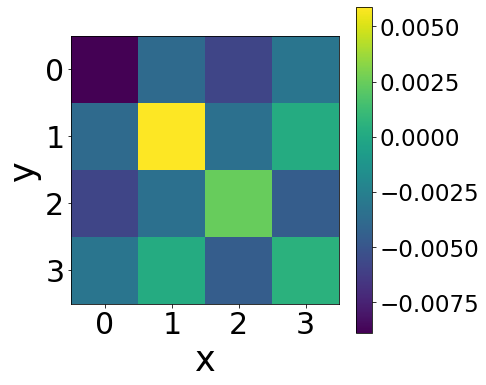

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.imshow(np.real(avg_mat))
plt.colorbar(orientation='vertical').ax.tick_params(labelsize=23)
plt.ylabel('y',fontsize=35)
plt.xlabel('x',fontsize=35)
plt.yticks([0, 1, 2, 3], [0, 1, 2, 3],fontsize=30)
plt.xticks([0, 1, 2, 3], [0, 1, 2, 3],fontsize=30)
plt.show()

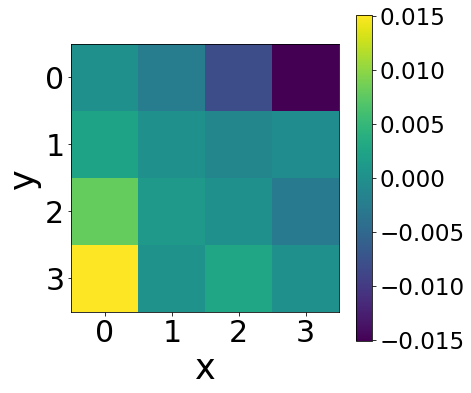

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.imshow(np.imag(avg_mat))
plt.colorbar(orientation='vertical').ax.tick_params(labelsize=23)
plt.ylabel('y',fontsize=35)
plt.xlabel('x',fontsize=35)
plt.yticks([0, 1, 2, 3], [0, 1, 2, 3],fontsize=30)
plt.xticks([0, 1, 2, 3], [0, 1, 2, 3],fontsize=30)
plt.show()

In [11]:
# define qubits q1 and q2
qq = TwoQubits([0,0,-1],[0,0,-1])

In [12]:
print(qq.coef_matrix)
print(qq.get_matrix())

[[ 0.25  0.    0.   -0.25]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [-0.25  0.    0.    0.25]]
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [13]:
noisy_QFT_circuit(qq.coef_matrix)

Noise gate number  10
Noise gate number  8
Noise gate number  1
Noise gate number  13
Noise gate number  15


array([[ 2.50000000e-01+0.j,  0.00000000e+00+0.j, -2.48882904e-01+0.j,
         2.77555756e-17+0.j],
       [-2.31285767e-01+0.j,  0.00000000e+00+0.j,  2.30252293e-01+0.j,
        -2.77555756e-17+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j]])

In [24]:
import random

In [27]:
random.random()

0.8579160018299248

In [26]:
random.randint(2,94)

9

In [22]:
randint(0,3)

NameError: name 'randint' is not defined